In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [10]:
bias = 100
X, y, coef = make_regression(n_features=1,bias=bias, coef=True, noise=10, random_state=42 )

In [11]:
X.shape, y.shape

((100, 1), (100,))

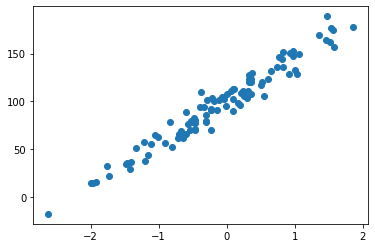

In [12]:
plt.scatter(X, y)

In [14]:
coef, bias

(array(41.74110031), 100)

In [15]:
y_gen = X * coef + bias

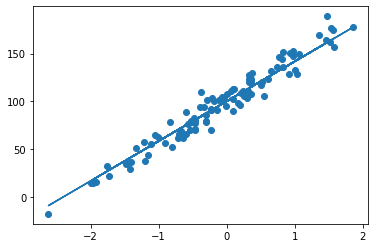

In [19]:
plt.scatter(X, y)
plt.plot(X, y_gen)

## Linear regression sklearn model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
model.coef_, model.intercept_

(array([44.43716999]), 101.16511532052698)

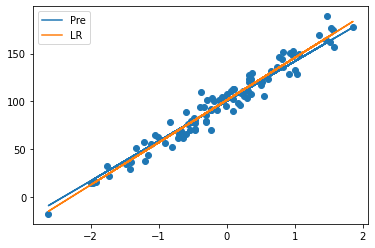

In [26]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="LR")
plt.legend()

# Custom Linear Regression

## class CustomLinearReg:
  def __init__(self, lr=0.1):
    self.lr = lr

  def fit(self, X, y):
    self._X = X
    self._y = y.reshape(-1, 1)

    self.coef_ = np.random.random()
    self.intercept_ = np.random.random()

    errors = []

    for i in range(50):
      self.gradient_descend()
      errors.append(self.error())

    return errors

  def gradient_descend(self):
    d_coef, d_intercept = self.gradient()

    self.coef_ -= (d_coef * self.lr)            # m = m+(-de^2/dm * lr)
    self.intercept_ -= (d_intercept * self.lr)  # c = c+(-de^2/dc *lr)

  def gradient(self):
    yh = self.predict(self._X)

    d_coef = ((yh - self._y) * self._X).mean()
    d_intercept = ((yh - self._y)).mean()

    return d_coef, d_intercept


  def predict(self, X):
    return (X * self.coef_ + self.intercept_)

  def error(self):
    return ((self.predict(self._X) - self._y) ** 2).sum()



In [39]:
model2 = CustomLinearReg()

In [40]:
error = model2.fit(X, y)

In [41]:
model2.coef_, model2.intercept_

(43.26467447709923, 100.29792019635032)

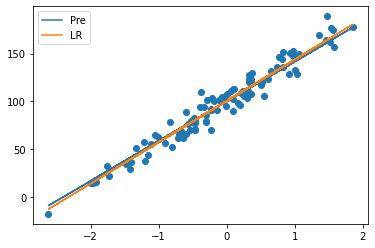

In [42]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model2.predict(X), label="LR")
plt.legend()

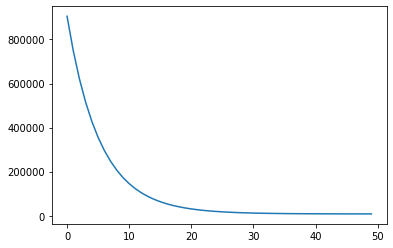

In [43]:
plt.plot(error)

In [47]:
# for i in range(1, 10):
#   model3 = CustomLinearReg(lr = .1 * i)
#   errors = model3.fit(X, y)

#   plt.figure()
#   plt.title( .1 * i)
#   plt.plot(errors)


# HOUSING PROBLEM

In [48]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split

In [49]:
X, y = load_boston(return_X_y=True)

In [54]:
boston = load_boston()

In [58]:
# print(boston.DESCR)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [61]:
model4 = LinearRegression()

In [62]:
model4.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
model4.predict(X_test[:1])

array([28.53469469])

In [69]:
y_test[:1]

array([23.6])

# Salary Data

In [98]:
dataset = pd.read_csv('Salary_Data.csv')

In [99]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [100]:
model5 = LinearRegression()

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [102]:
model5.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
model5.predict(X_test[:5])

array([116511.83848464,  72097.0155738 , 103281.8912346 ,  75877.00050238,
        56032.07962732])

In [104]:
y_test[:5]

array([112635.,  67938., 113812.,  83088.,  64445.])

In [105]:
model5.score(X_test, y_test)

0.9575534035989951

In [112]:
yrs = int(input("How many years of experience do you have?"))
salary = model5.predict(np.array([yrs]).reshape(-1, 1))
print("\nYour estimated salary is $", round(salary[0], 2))

How many years of experience do you have?8

Your estimated salary is $ 101391.9
